## 0. Veri Setinin Hazırlanması

### Veri Seti ve Adresi:

### Jobs and Salaries in Data Science :

In [59]:
# Kullanacağımız kütüphaneleri yükleyelim.

# Pandas ve NumPy
import pandas as pd
import numpy as np

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
# Veri setini yüklenmesi.

data_set=pd.read_csv("Sales Data.csv")
df = data_set.copy()

In [61]:
# Veri hakkında bilgi ediniyoruz

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [62]:
# Veri setinde rasgele eksik veriler oluşturalım.

import random

def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,missing_rate = 0.03)

In [63]:
#Bir üst blokta yaptığımız işlem işe yaradı mı kontrolüü sağlıyoruz.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        180504 non-null  float64
 1   Order ID          180359 non-null  float64
 2   Product           180447 non-null  object 
 3   Quantity Ordered  180488 non-null  float64
 4   Price Each        180522 non-null  float64
 5   Order Date        180623 non-null  object 
 6   Purchase Address  180364 non-null  object 
 7   Month             180445 non-null  float64
 8   Sales             180463 non-null  float64
 9   City              180457 non-null  object 
 10  Hour              180293 non-null  float64
dtypes: float64(7), object(4)
memory usage: 15.6+ MB


## 1.Veriye İlk Bakış

In [64]:
# Veri setinin gözlemini görelim.

df.head(60)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0.0,295665.0,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City,0.0
1,1.0,295666.0,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City,7.0
2,2.0,295667.0,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City,18.0
3,3.0,295668.0,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco,15.0
4,4.0,295669.0,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta,12.0
5,5.0,295670.0,AA Batteries (4-pack),1.0,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12.0,3.84,New York City,22.0
6,6.0,295671.0,USB-C Charging Cable,1.0,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12.0,11.95,Portland,15.0
7,7.0,295672.0,USB-C Charging Cable,2.0,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12.0,23.90,Dallas,9.0
8,8.0,295673.0,Bose SoundSport Headphones,1.0,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12.0,99.99,Dallas,23.0
9,9.0,295674.0,NaN,4.0,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12.0,11.96,Dallas,11.0


In [65]:
# Veri setindeki satır ve sütun sayılarını görelim

df.shape

(185950, 11)

In [66]:
# Veri setindeki kolonları yazdırır.
print(list(df.columns), '\n')

# len() fonksiyonu ile toplam kolon sayısına erişiyoruz.
print(f"Veri seti içerisinde toplam {len(df.columns)} kolon vardır.\n")

# Çoğu zaman kullandığımız attribute ve fonksiyonların sonuçlarının hangi tipte veri döndürdüğünü gözlemlemek kod üzerinde hakimiyet kurmak için önemlidir.
print(f"df.columns'un döndüğü veri tipi: {type(df.columns)}\n")

['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'] 

Veri seti içerisinde toplam 11 kolon vardır.

df.columns'un döndüğü veri tipi: <class 'pandas.core.indexes.base.Index'>



In [67]:
# Değişkenleri ve tiplerini görüntüleyelim.

df.dtypes

Unnamed: 0          float64
Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
Month               float64
Sales               float64
City                 object
Hour                float64
dtype: object

In [68]:
# Veri setimizde kategorik ve numerik özellikler birlikte bulunmakta. 
# Bu özellikleri ayırmak ileriki aşamalarda kullanışlı olabilir.

categorical_features = []
numerical_features = []

for col in df.columns:
    if (df[col].dtype == "object") or (df[col].dtype == "categorical"):
        categorical_features.append(col)
    else:
        numerical_features.append(col)


In [69]:
categorical_features, numerical_features

(['Product', 'Order Date', 'Purchase Address', 'City'],
 ['Unnamed: 0',
  'Order ID',
  'Quantity Ordered',
  'Price Each',
  'Month',
  'Sales',
  'Hour'])

In [70]:
#Döngü içerisinde, mevcut kolon ismi categorical_features içerisinde bulunuyorsa, o zaman o kolonun tipini Categorical olarak değiştirelim
#Bulunmuyorsa bir işlem yapmayalım.

for col in df.columns:
    if col in categorical_features:
        df[col] = pd.Categorical(df[col])

In [71]:
# Bir önceki aşamadaki işlemin kontrolünü yapalım.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        180504 non-null  float64 
 1   Order ID          180359 non-null  float64 
 2   Product           180447 non-null  category
 3   Quantity Ordered  180488 non-null  float64 
 4   Price Each        180522 non-null  float64 
 5   Order Date        180623 non-null  category
 6   Purchase Address  180364 non-null  category
 7   Month             180445 non-null  float64 
 8   Sales             180463 non-null  float64 
 9   City              180457 non-null  category
 10  Hour              180293 non-null  float64 
dtypes: category(4), float64(7)
memory usage: 21.9 MB


In [72]:
# Veri setimizin betimsel istatistiklerine ulaşmak için describe() fonksiyonunu kullanıyoruz.

df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,180504.000000,180359.000000,180488.000000,180522.000000,180445.000000,180463.000000,180293.000000
mean,8345.593643,230397.204498,1.124789,184.361472,7.057114,185.514810,14.411286
std,5451.101426,51519.685579,0.443974,332.755848,3.502650,332.856811,5.424599
min,0.000000,141235.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3900.000000,185811.500000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7792.000000,230350.000000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11880.000000,275016.500000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


## 2. Eksik Veri Analizi

### Eksik Verilerin Gözlemlenmesi

In [256]:
#Eksik veri miktarına bakalım.

df.isnull().sum()

Unnamed: 0          5446
Order ID            5591
Product             5503
Quantity Ordered    5462
Price Each          5428
Order Date          5327
Purchase Address    5586
Month               5505
Sales               5487
City                5493
Hour                5657
dtype: int64

In [257]:
# Eksik olmayan değerlerin sayısı

df.notnull().sum()

Unnamed: 0          180504
Order ID            180359
Product             180447
Quantity Ordered    180488
Price Each          180522
Order Date          180623
Purchase Address    180364
Month               180445
Sales               180463
City                180457
Hour                180293
dtype: int64

In [258]:
# Veri setinde toplam kaç adet eksik gözlem var, kaç adet eksik olmayan gözlem var görelim.

print(f"Veri seti içerisinde toplam {df.notnull().sum().sum()} adet eksik olmayan, {df.isnull().sum().sum()} eksik gözlem var.")

Veri seti içerisinde toplam 1984965 adet eksik olmayan, 60485 eksik gözlem var.


In [259]:
# Veri setinde en az bir gözlemi eksik olan kayıtlara da ulaşabiliriz.

df[df.isnull().any(axis = 1)]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
9,9.0,295674.0,NaN,4.0,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12.0,11.96,Dallas,11.0
13,NaN,295678.0,AAA Batteries (4-pack),2.0,2.99,2019-12-06 09:38:00,"187 Lincoln St, Dallas, TX 75001",12.0,5.98,Dallas,9.0
14,14.0,295679.0,USB-C Charging Cable,1.0,11.95,NaN,"902 2nd St, Dallas, TX 75001",12.0,11.95,Dallas,9.0
18,18.0,295681.0,Bose SoundSport Headphones,1.0,99.99,NaN,"79 Elm St, Boston, MA 02215",NaN,99.99,Boston,12.0
20,NaN,295682.0,USB-C Charging Cable,1.0,11.95,2019-12-23 19:25:00,NaN,12.0,11.95,Portland,19.0
...,...,...,...,...,...,...,...,...,...,...,...
185932,13604.0,222893.0,USB-C Charging Cable,1.0,11.95,2019-06-28 18:50:00,"802 Church St, Los Angeles, CA 90001",6.0,11.95,Los Angeles,NaN
185937,13609.0,222898.0,20in Monitor,1.0,109.99,2019-06-29 15:08:00,"798 Park St, San Francisco, CA 94016",6.0,109.99,NaN,15.0
185943,13615.0,222903.0,Lightning Charging Cable,1.0,14.95,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6.0,NaN,NaN,22.0
185946,13618.0,NaN,27in FHD Monitor,1.0,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6.0,149.99,New York City,19.0


In [260]:
# Hiç eksik gözlemi bulunmayan kayıtları getirelim.

df[df.notnull().all(axis = 1)][:5]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0.0,295665.0,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City,0.0
1,1.0,295666.0,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City,7.0
2,2.0,295667.0,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City,18.0
3,3.0,295668.0,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco,15.0
4,4.0,295669.0,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta,12.0


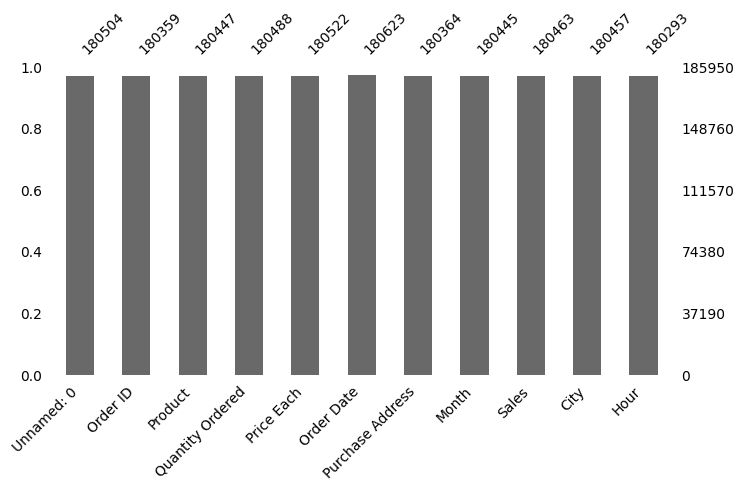

In [261]:
import missingno as msno

msno.bar(df = df,
         figsize = (8, 4),
         fontsize = 10);

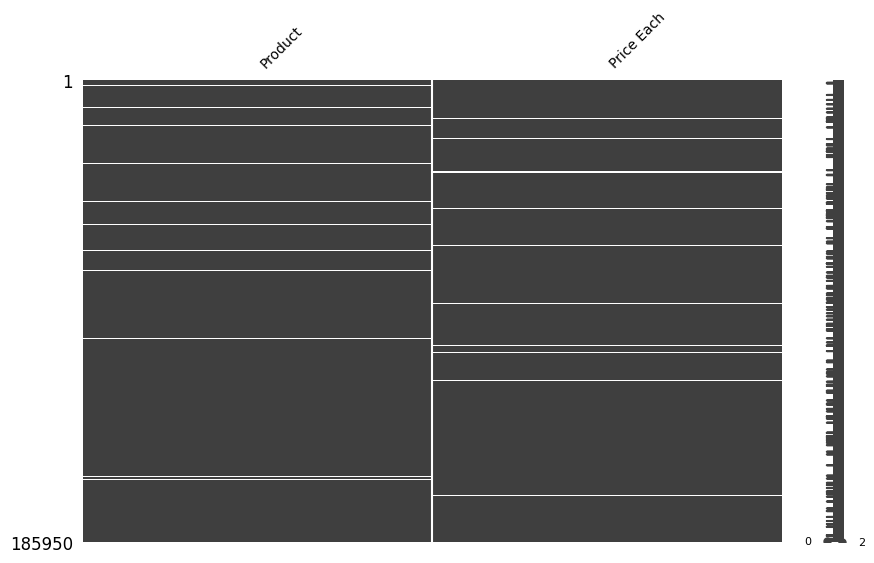

In [262]:
# msno.matrix(), değişkenlerde bulunan eksik değerlerin ilişkili olup olmadığını görsel yolla tespit etmek için kullanılabilir.
msno.matrix(df = df[['Product', 'Price Each']],
            figsize = (10, 6),
            fontsize = 10);

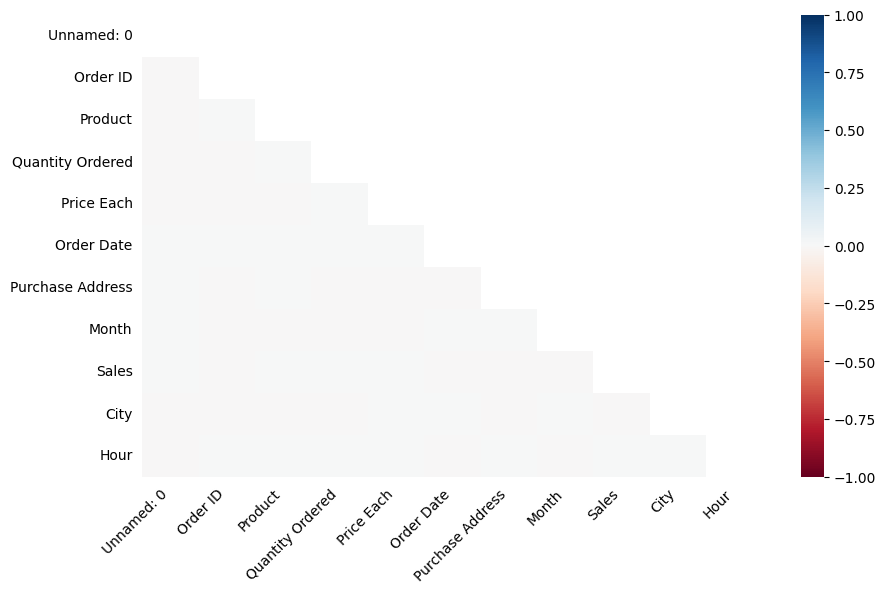

In [263]:
# Nullity Correlation (Heatmap)
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.
msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

### Eksik Verilerin Doldurulması

In [264]:
# Doldurma işlemlerini gerçekleştirmek için veri setimin bir kopyasını oluşturuyorum

df_fillna = df.copy()

#### Sayısal Değişkenlerin Doldurulması

Veri setini incelerken "Pirice Each" verisinin "Quantity Ordered" ve "Sales" verilerinin bölümünden bulunabildiğini farkettim. 
Eksik olan "Pirice Each" verilerini denetledim ve gerekli bölme işlemini yaparak doldurdum. Ancak bu doldurma işlemi için "Quantity Ordered" ve "Sales" değerlerinin boş olmaması gerektiği için boş oldukları satırlarda işlem yapamadım.

In [282]:
def fill_price_each(row):
    if pd.isna(row['Price Each']):  # Eğer "Price Each" eksikse
        if not pd.isna(row['Sales']) and not pd.isna(row['Quantity Ordered']):  # Diğer sütunlarda eksik yoksa
            return row['Sales'] / row['Quantity Ordered']  # Hesapla ve doldur
    return row['Price Each']  # Eksik değilse olduğu gibi bırak

# "Price Each" sütununu doldurmak için apply fonksiyonunu kullanıyoruz
df_fillna['Price Each'] = df_fillna.apply(fill_price_each, axis=1)


In [283]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        180504 non-null  float64 
 1   Order ID          182586 non-null  float64 
 2   Product           185938 non-null  object  
 3   Quantity Ordered  185627 non-null  float64 
 4   Price Each        185950 non-null  float64 
 5   Order Date        180623 non-null  category
 6   Purchase Address  180364 non-null  category
 7   Month             180445 non-null  float64 
 8   Sales             185627 non-null  float64 
 9   City              180457 non-null  category
 10  Hour              185950 non-null  float64 
dtypes: category(3), float64(7), object(1)
memory usage: 23.1+ MB


In [284]:
# 58. indexin "Price Each" değeri boştu yaptığımız işlem başarılımı kontrolü yapıldı.
df_fillna.head(59)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0.0,295665.0,Macbook Pro Laptop,1.00,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City,0.0
1,1.0,295666.0,LG Washing Machine,1.00,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City,7.0
2,2.0,295667.0,USB-C Charging Cable,1.00,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City,18.0
3,3.0,295668.0,27in FHD Monitor,1.00,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco,15.0
4,4.0,295669.0,USB-C Charging Cable,1.00,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta,12.0
5,5.0,295670.0,AA Batteries (4-pack),1.00,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12.0,3.84,New York City,22.0
6,6.0,295671.0,USB-C Charging Cable,1.00,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12.0,11.95,Portland,15.0
7,7.0,295672.0,USB-C Charging Cable,2.00,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12.0,23.90,Dallas,9.0
8,8.0,295673.0,Bose SoundSport Headphones,1.00,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12.0,99.99,Dallas,23.0
9,9.0,295674.0,AAA Batteries (4-pack),4.00,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12.0,11.96,Dallas,11.0


Veri setini incelerken "Sales" verisinin "Quantity Ordered" ve "Pirice Each" verilerinin bölümünden bulunabildiğini farkettim. Eksik olan "Sales" verilerini denetledim ve gerekli bölme işlemini yaparak doldurdum. Ancak bu doldurma işlemi için "Quantity Ordered" ve "Pirice Each" değerlerinin boş olmaması gerektiği için boş oldukları satırlarda işlem yapamadım.

In [285]:
def fill_sales(row):
    if pd.isna(row['Sales']):  # Eğer "Price Each" eksikse
        if not pd.isna(row['Price Each']) and not pd.isna(row['Quantity Ordered']):  # Diğer sütunlarda eksik yoksa
            return row['Price Each'] / row['Quantity Ordered']  # Hesapla ve doldur
    return row['Sales']  # Eksik değilse olduğu gibi bırak

# "Price Each" sütununu doldurmak için apply fonksiyonunu kullanıyoruz
df_fillna['Sales'] = df_fillna.apply(fill_sales, axis=1)

In [286]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        180504 non-null  float64 
 1   Order ID          182586 non-null  float64 
 2   Product           185938 non-null  object  
 3   Quantity Ordered  185627 non-null  float64 
 4   Price Each        185950 non-null  float64 
 5   Order Date        180623 non-null  category
 6   Purchase Address  180364 non-null  category
 7   Month             180445 non-null  float64 
 8   Sales             185786 non-null  float64 
 9   City              180457 non-null  category
 10  Hour              185950 non-null  float64 
dtypes: category(3), float64(7), object(1)
memory usage: 23.1+ MB


Veri setini incelerken "Quantity Ordered" verisinin "Sales" ve "Pirice Each" verilerinin çarpımından bulunabildiğini farkettim. Eksik olan "Quantity Ordered" verilerini denetledim ve gerekli çarpma işlemini yaparak doldurdum. Ancak bu doldurma işlemi için "Sales" ve "Pirice Each" değerlerinin boş olmaması gerektiği için boş oldukları satırlarda işlem yapamadım.

In [270]:
def fill_quantity_ordered(row):
    if pd.isna(row['Quantity Ordered']):  # Eğer "Price Each" eksikse
        if not pd.isna(row['Price Each']) and not pd.isna(row['Sales']):  # Diğer sütunlarda eksik yoksa
            return row['Price Each'] * row['Sales']  # Hesapla ve doldur
    return row['Quantity Ordered']  # Eksik değilse olduğu gibi bırak

# "Price Each" sütununu doldurmak için apply fonksiyonunu kullanıyoruz
df_fillna['Quantity Ordered'] = df_fillna.apply(fill_quantity_ordered, axis=1)

In [271]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        180504 non-null  float64 
 1   Order ID          180359 non-null  float64 
 2   Product           180447 non-null  category
 3   Quantity Ordered  185627 non-null  float64 
 4   Price Each        185626 non-null  float64 
 5   Order Date        180623 non-null  category
 6   Purchase Address  180364 non-null  category
 7   Month             180445 non-null  float64 
 8   Sales             185627 non-null  float64 
 9   City              180457 non-null  category
 10  Hour              180293 non-null  float64 
dtypes: category(4), float64(7)
memory usage: 21.9 MB


In [272]:
def fill_order_ID(row):
    if pd.isna(row['Order ID']):  # Eğer "Price Each" eksikse
        if not pd.isna(row['Price Each']) and not pd.isna(row['Sales']):  # Diğer sütunlarda eksik yoksa
            return row['Price Each'] + row['Sales']  # Hesapla ve doldur
    return row['Quantity Ordered']  # Eksik değilse olduğu gibi bırak

# "Price Each" sütununu doldurmak için apply fonksiyonunu kullanıyoruz
df_fillna['Quantity Ordered'] = df_fillna.apply(fill_order_ID, axis=1)

In [273]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        180504 non-null  float64 
 1   Order ID          180359 non-null  float64 
 2   Product           180447 non-null  category
 3   Quantity Ordered  185627 non-null  float64 
 4   Price Each        185626 non-null  float64 
 5   Order Date        180623 non-null  category
 6   Purchase Address  180364 non-null  category
 7   Month             180445 non-null  float64 
 8   Sales             185627 non-null  float64 
 9   City              180457 non-null  category
 10  Hour              180293 non-null  float64 
dtypes: category(4), float64(7)
memory usage: 21.9 MB


Veri setini incelerken her "Product" verisinin bir "Price Each" verisi ile eşleştiğini farkettim. Eksik olan "Price Each" verilerini denetledim ve diğer "Product" değeri ile eşleşenler ile doldurdum. Ancak bu doldurma işlemi için "Product"  değerinin boş olmaması gerektiği için boş oldukları satırlarda işlem yapamadım.

In [353]:
price_map = df_fillna.groupby("Product")["Price Each"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

df_fillna["Price Each"] = df_fillna.apply(
    lambda row: price_map[row["Product"]] if pd.notna(row["Product"]) and pd.isna(row["Price Each"]) else row["Price Each"],
    axis=1
)

In [275]:
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        180504 non-null  float64 
 1   Order ID          180359 non-null  float64 
 2   Product           180447 non-null  category
 3   Quantity Ordered  185627 non-null  float64 
 4   Price Each        185950 non-null  float64 
 5   Order Date        180623 non-null  category
 6   Purchase Address  180364 non-null  category
 7   Month             180445 non-null  float64 
 8   Sales             185627 non-null  float64 
 9   City              180457 non-null  category
 10  Hour              180293 non-null  float64 
dtypes: category(4), float64(7)
memory usage: 21.9 MB


Veri setini incelerken her "Price Each" verisinin bir "Product" verisi ile eşleştiğini farkettim. Eksik olan "Product" verilerini denetledim ve diğer "Price Each" değeri ile eşleşenler ile doldurdum. Ancak bu doldurma işlemi için "Price Each" değerinin boş olmaması gerektiği için boş oldukları satırlarda işlem yapamadım.

In [276]:
# Her bir Price Each için en sık görülen Product değerini belirle
product_map = df_fillna.groupby("Price Each")["Product"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Sadece Price Each değeri eksik olmayan satırları işleyerek Product değerlerini doldur
df_fillna["Product"] = dffd.apply(
    lambda row: product_map[row["Price Each"]] if pd.notna(row["Price Each"]) and pd.isna(row["Product"]) else row["Product"],
    axis=1
)
# Sonuçları yazdır
df_fillna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Unnamed: 0        180504 non-null  float64 
 1   Order ID          180359 non-null  float64 
 2   Product           185938 non-null  object  
 3   Quantity Ordered  185627 non-null  float64 
 4   Price Each        185950 non-null  float64 
 5   Order Date        180623 non-null  category
 6   Purchase Address  180364 non-null  category
 7   Month             180445 non-null  float64 
 8   Sales             185627 non-null  float64 
 9   City              180457 non-null  category
 10  Hour              180293 non-null  float64 
dtypes: category(3), float64(7), object(1)
memory usage: 23.1+ MB


In [354]:
df_fillna.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

Veri setimizdeki boş "Hour" değerlerinin doldurulması.

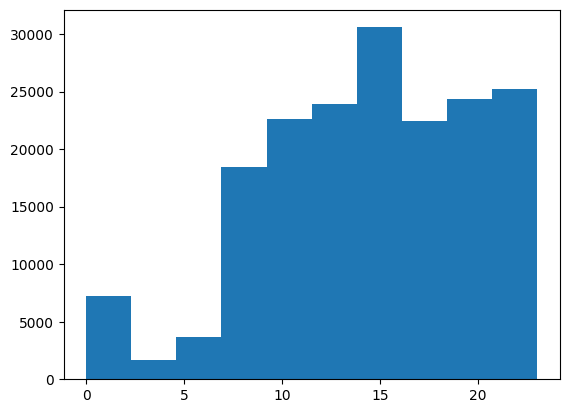

In [278]:
# Hour sayısal değişkenin dağılımını görmek için histogram kullandık.

plt.hist(df['Hour'])
plt.show()

In [279]:
# Grafiğin dağılımına bakarak median değeri ile doldurmak daha sağlıklı olucaktır.

median_salary = df_fillna['Hour'].median()
df_fillna['Hour'].fillna(value = median_salary, inplace = True)
df_fillna.isna().sum()

C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\2944341613.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Hour'].fillna(value = median_salary, inplace = True)


Unnamed: 0          5446
Order ID            5591
Product               12
Quantity Ordered     323
Price Each             0
Order Date          5327
Purchase Address    5586
Month               5505
Sales                323
City                5493
Hour                   0
dtype: int64

In [280]:
df_fillna["Price Each"] = dffd.apply(
    lambda row: price_map[row["Product"]] if pd.notna(row["Product"]) and pd.isna(row["Price Each"]) else row["Price Each"],
    axis=1
)

Veri setini incelerken her "Purchase Address" verisinin bir "Order ID" verisi ile eşleştiğini farkettim. Eksik olan "Order ID" verilerini denetledim ve diğer "Purchase Address" değeri ile eşleşenler ile doldurdum.

In [281]:
order_id_map = df_fillna.groupby("Purchase Address")["Order ID"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Sadece Purchase Address değeri kategorik ve Order ID değeri eksik olan satırları işleyerek doldur
df_fillna["Order ID"] = df_fillna.apply(
    lambda row: order_id_map[row["Purchase Address"]] if pd.notna(row["Purchase Address"]) and pd.isna(row["Order ID"]) else row["Order ID"],
    axis=1
)

C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\4225572984.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_id_map = df_fillna.groupby("Purchase Address")["Order ID"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)


In [287]:
df_fillna.isna().sum()

Unnamed: 0          5446
Order ID            3364
Product               12
Quantity Ordered     323
Price Each             0
Order Date          5327
Purchase Address    5586
Month               5505
Sales                164
City                5493
Hour                   0
dtype: int64

Veri setimizdeki bir önceki işlemlerde tamamını dolduramadığımız "Quantity Ordered" değerlerinin doldurulması.

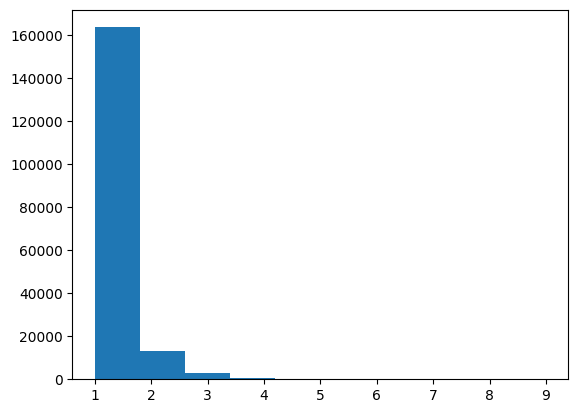

In [288]:
# Hour sayısal değişkenin dağılımını görmek için histogram kullandık.

plt.hist(df['Quantity Ordered'])
plt.show()

In [314]:
# Grafiğe bakarak mode değeri ile doldurmak daha sağlıklı olduğu için mode ile dolduruldu.

mean_salary = df_fillna['Quantity Ordered'].mean()
df_fillna['Quantity Ordered'].fillna(value = mean_salary, inplace = True)
df_fillna.isna().sum()

C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\748019598.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Quantity Ordered'].fillna(value = mean_salary, inplace = True)


Unnamed: 0             0
Order ID            3364
Product               12
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                5493
Hour                   0
dtype: int64

Veri setimizdeki bir önceki işlemlerde tamamını dolduramadığımız "Quantity Ordered" değerlerini mean değeri ile doldurmuştuk. Bu değerden yararlanarak hesaplayabildiğimiz "Price Each" ve 'Sales' değerlerini tekrardan doldurmaya çalışıyoruz.

In [315]:
def fill_price_each(row):
    if pd.isna(row['Price Each']):  # Eğer "Price Each" eksikse
        if not pd.isna(row['Sales']) and not pd.isna(row['Quantity Ordered']):  # Diğer sütunlarda eksik yoksa
            return row['Sales'] / row['Quantity Ordered']  # Hesapla ve doldur
    return row['Price Each']  # Eksik değilse olduğu gibi bırak

# "Price Each" sütununu doldurmak için apply fonksiyonunu kullanıyoruz
df_fillna['Price Each'] = df_fillna.apply(fill_price_each, axis=1)

df_fillna.isna().sum()

Unnamed: 0             0
Order ID            3364
Product               12
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                5493
Hour                   0
dtype: int64

In [316]:
def fill_sales(row):
    if pd.isna(row['Sales']):  # Eğer "Price Each" eksikse
        if not pd.isna(row['Price Each']) and not pd.isna(row['Quantity Ordered']):  # Diğer sütunlarda eksik yoksa
            return row['Price Each'] / row['Quantity Ordered']  # Hesapla ve doldur
    return row['Sales']  # Eksik değilse olduğu gibi bırak

# "Price Each" sütununu doldurmak için apply fonksiyonunu kullanıyoruz
df_fillna['Sales'] = df_fillna.apply(fill_sales, axis=1)

df_fillna.isna().sum()

Unnamed: 0             0
Order ID            3364
Product               12
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                5493
Hour                   0
dtype: int64

Veri setimizdeki bir önceki işlemlerde tamamını dolduramadığımız 'Sales' ve 'Price Each' değerlerinin doldurulması.

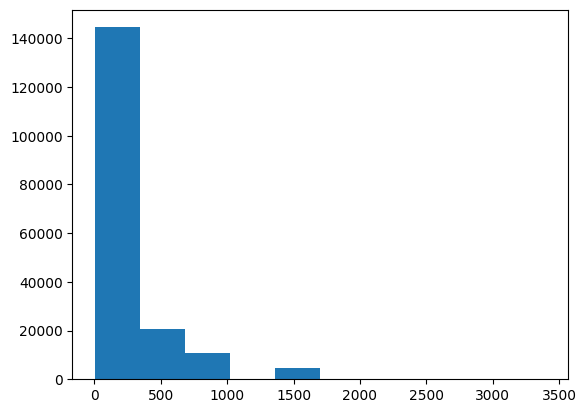

In [317]:
# Sales sayısal değişkenin dağılımını görmek için histogram kullandık.

plt.hist(df['Sales'])
plt.show()

In [318]:
# Grafiğe bakarak mean değeri ile doldurmak daha sağlıklı olduğu için mode ile dolduruldu.

mean_salary = df_fillna['Sales'].mean()
df_fillna['Sales'].fillna(value = mean_salary, inplace = True)

df_fillna.isna().sum()

C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\4178225686.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Sales'].fillna(value = mean_salary, inplace = True)


Unnamed: 0             0
Order ID            3364
Product               12
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                5493
Hour                   0
dtype: int64

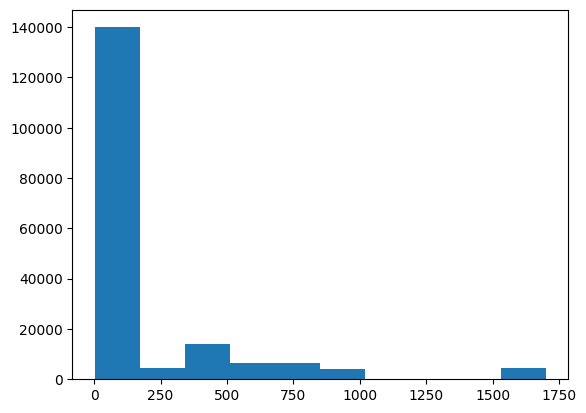

In [319]:
# Price Each sayısal değişkenin dağılımını görmek için histogram kullandık.

plt.hist(df['Price Each'])
plt.show()

In [320]:
# Grafiğe bakarak mode değeri ile doldurmak daha sağlıklı olduğu için mode ile dolduruldu.

mode_salary = df_fillna['Price Each'].mode()
df_fillna['Price Each'].fillna(value = mode_salary, inplace = True)
df_fillna.isna().sum()

C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\1454955287.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Price Each'].fillna(value = mode_salary, inplace = True)


Unnamed: 0             0
Order ID            3364
Product               12
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                5493
Hour                   0
dtype: int64

Veri setini incelerken her "Purchase Address" verisinin bir "Order ID" verisi ile eşleştiğini farkettim. Eksik olan "Purchase Address" verilerini denetledim ve diğer "Order ID" değeri ile eşleşenler ile doldurdum.

In [321]:
order_id_map = df_fillna.groupby("Order ID")["Purchase Address"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Sadece Purchase Address değeri kategorik ve Order ID değeri eksik olan satırları işleyerek doldur
df_fillna["Purchase Address"] = df_fillna.apply(
    lambda row: order_id_map[row["Order ID"]] if pd.notna(row["Order ID"]) and pd.isna(row["Purchase Address"]) else row["Purchase Address"],
    axis=1
)
df_fillna.isna().sum()

Unnamed: 0             0
Order ID            3364
Product               12
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                5493
Hour                   0
dtype: int64

Veri setindeki "Month" değerinin doldurulması.

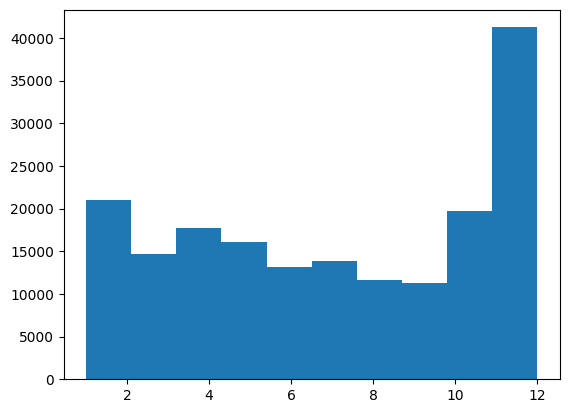

In [322]:
# Month sayısal değişkenin dağılımını görmek için histogram kullandık.

plt.hist(df['Month'])
plt.show()

In [323]:
# Grafiğe bakarak median değeri ile doldurmak daha sağlıklı olduğu için mode ile dolduruldu.

median_salary = df_fillna['Month'].median()
df_fillna['Month'].fillna(value = median_salary, inplace = True)
df_fillna.isna().sum()

C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\255216867.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Month'].fillna(value = median_salary, inplace = True)


Unnamed: 0             0
Order ID            3364
Product               12
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                5493
Hour                   0
dtype: int64

Veri setindeki "Unnamed: 0" değerini mean ile doldurdum.

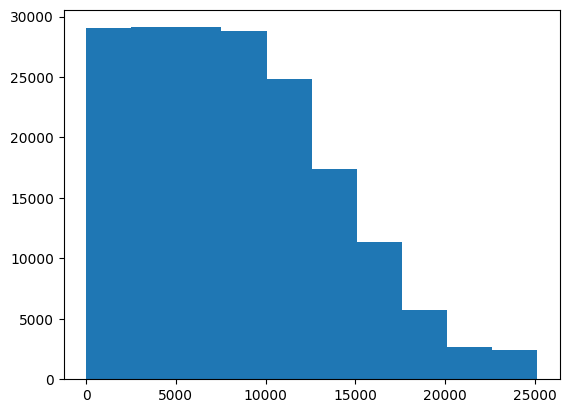

In [324]:
# Month sayısal değişkenin dağılımını görmek için histogram kullandık.

plt.hist(df["Unnamed: 0"])
plt.show()

In [325]:
# Grafiğe bakarak median değeri ile doldurmak daha sağlıklı olduğu için mode ile dolduruldu.

median_salary = df_fillna['Unnamed: 0'].median()
df_fillna['Unnamed: 0'].fillna(value = median_salary, inplace = True)
df_fillna.isna().sum()

C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\2776073377.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna['Unnamed: 0'].fillna(value = median_salary, inplace = True)


Unnamed: 0             0
Order ID            3364
Product               12
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                5493
Hour                   0
dtype: int64

In [326]:
order_id_map = dffd.groupby("City")["Purchase Address"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Sadece Purchase Address değeri kategorik ve Order ID değeri eksik olan satırları işleyerek doldur
dffd["Purchase Address"] = dffd.apply(
    lambda row: order_id_map[row["City"]] if pd.notna(row["City"]) and pd.isna(row["Purchase Address"]) else row["Purchase Address"],
    axis=1
)
df_fillna.isna().sum()

C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\801781634.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_id_map = dffd.groupby("City")["Purchase Address"].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)


Unnamed: 0             0
Order ID            3364
Product               12
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                5493
Hour                   0
dtype: int64

"Order Date" değerinin mode değeri ile doldurulması işlemi.

In [327]:
# work_setting değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = dffd['Order Date'].mode()

# work_setting değişkenini mode değeri ile dolduralım.
df_fillna['Order Date'] = df_fillna['Order Date'].fillna(value = work_setting_mode[0])

# Eksik verilerimizi görüntüleyelim
df_fillna.isna().sum()

Unnamed: 0             0
Order ID            3364
Product               12
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                5493
Hour                   0
dtype: int64

Daha önceki doldurma işlemlerimize rağmen eksik kalan "Product" değerini mode değeri ile doldurmamız daha sağlıklı olucağından bu işlemi yapıyoruz.

In [328]:
# work_setting değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = dffd['Product'].mode()

# work_setting değişkenini mode değeri ile dolduralım.
df_fillna['Product'] = df_fillna['Product'].fillna(value = work_setting_mode[0])

# Eksik verilerimizi görüntüleyelim
df_fillna.isna().sum()

Unnamed: 0             0
Order ID            3364
Product                0
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                5493
Hour                   0
dtype: int64

In [338]:
dffd=df_fillna.copy()

Eksik olan "City" değerlerinin doldurulması işlemi. "City" değerini incelediğimde gelellikle peş peşşe aynı yerlerin çoğunlukla peş peşe sıralandığını gördüm mean ve ya median değeri ile doldursam hata oranı daha fazla olucaktı o sebepten bir önceki değer ile doldurmayı seçtim.

In [345]:
# Bir önceki değerle doldurma işlemi
df_fillna["City"].fillna(method = "bfill", inplace=True)
df_fillna.isna().sum()



C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\3290509425.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna["City"].fillna(method = "bfill", inplace=True)
C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\3290509425.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["City"].fillna(method = "bfill", inplace=True)


Unnamed: 0             0
Order ID            3364
Product                0
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                   0
Hour                   0
dtype: int64

 Order ID değerini doldurma işlemi

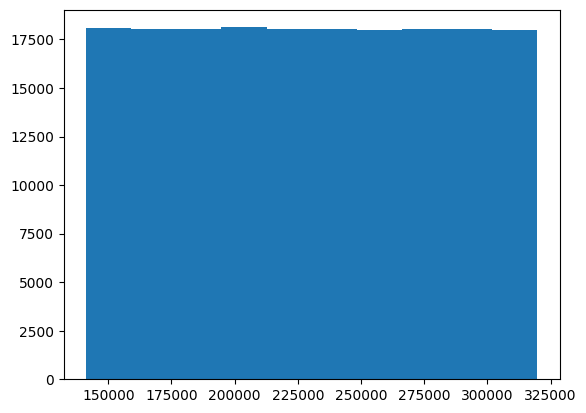

In [346]:
# Order ID sayısal değişkenin dağılımını görmek için histogram kullandık.

plt.hist(df["Order ID"])
plt.show()

Dağılımı gördükten sonra ve veri setini inceledikten sonra bir önceki değerin 1 fazlası ile doldurmanın daha uygun olduğnu farkettim.

In [347]:
# Bir önceki değerle doldurma işlemi

df_fillna["Order ID"].fillna(method = "bfill", inplace=True)
df_fillna.isna().sum()

C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\1408127675.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_fillna["Order ID"].fillna(method = "bfill", inplace=True)
C:\Users\hamza\AppData\Local\Temp\ipykernel_7012\1408127675.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fillna["Order ID"].fillna(method = "bfill", inplace=True)


Unnamed: 0             0
Order ID               0
Product                0
Quantity Ordered       0
Price Each             0
Order Date             0
Purchase Address    5211
Month                  0
Sales                  0
City                   0
Hour                   0
dtype: int64

In [348]:
# 44. indisin "Order ID" değeri boştu işlem sonunda dolduruldu.
 
df_fillna.head(50)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0.0,295665.0,Macbook Pro Laptop,1.000000,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12.0,1700.00,New York City,0.0
1,1.0,295666.0,LG Washing Machine,1.000000,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12.0,600.00,New York City,7.0
2,2.0,295667.0,USB-C Charging Cable,1.000000,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12.0,11.95,New York City,18.0
3,3.0,295668.0,27in FHD Monitor,1.000000,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12.0,149.99,San Francisco,15.0
4,4.0,295669.0,USB-C Charging Cable,1.000000,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12.0,11.95,Atlanta,12.0
5,5.0,295670.0,AA Batteries (4-pack),1.000000,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12.0,3.84,New York City,22.0
6,6.0,295671.0,USB-C Charging Cable,1.000000,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12.0,11.95,Portland,15.0
7,7.0,295672.0,USB-C Charging Cable,2.000000,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12.0,23.90,Dallas,9.0
8,8.0,295673.0,Bose SoundSport Headphones,1.000000,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12.0,99.99,Dallas,23.0
9,9.0,295674.0,AAA Batteries (4-pack),4.000000,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12.0,11.96,Dallas,11.0


Eksik olan 'Purchase Address' değerini en çok tekrar eden değerle dolduruldu.

In [349]:
# work_setting değişkeninde en çok tekrar eden değeri(mode) alalım.
work_setting_mode = df_fillna['Purchase Address'].mode()

# work_setting değişkenini mode değeri ile dolduralım.
df_fillna['Purchase Address'] = df_fillna['Purchase Address'].fillna(value = work_setting_mode[0])

# work_setting değişkeninde toplam kaç adet eksik değer olduğunu tekrar görelim.
df_fillna.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64